In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

This is an example of using Python calculate an plot the response of a damped oscillator driven by various forcing functions. The forcing function is expressed as its Fourier series (truncated), the response for each Fourier component is calculated, and all of the responses are added together to given the total response. Here, as an example, a periodic sawtooth forcing function is assumed, with $f(t+\tau)=f(t)$:
$$f(t)\equiv {1\over\tau}f_0 t\quad {\rm for} \quad -{\tau\over 2}<t<{\tau\over 2}$$
The Fourier coefficients are 
$$b_n=-{2f_0\over n\pi}(-1)^n$$
The steady-state response, from the differential equation
$$\ddot x+2\beta\dot x+\omega_0^2 x=f(t)\, ,$$
is 
$$x(t)=\sum_{n=1}^\infty A_n\cos(\omega_n t-\delta_n)\quad\quad \omega_n\equiv n{2\pi\over\tau}$$
where
$$A_n = {b_n\over\sqrt{\left(\omega_0^2-\omega_n^2\right)^2+4\beta^2\omega_n^2}}$$
and
$$\delta_n={2\beta\,\omega_n\over \omega_0^2-\omega_n^2}$$

In [33]:
# Parameters for the forcing or driving function
T = 1./0.4    # period of the driving function
N = 18             # maximum harmonic to include in the Fourier series
f0 = 1             # amplitude of the forcing function (force divided by mass)
bo = T/4
print("Example program for plotting the response of a forced oscillator")
print("A sawtooth forcing function is assumed, with amplitude ",f0)
print("The period is T=",T)
print(N," harmonics are included in the truncated Fourier series")

Example program for plotting the response of a forced oscillator
A sawtooth forcing function is assumed, with amplitude  1
The period is T= 2.5
18  harmonics are included in the truncated Fourier series


In [34]:
# Function returning the exact forcing function
def Fa(t):
    if t > -bo/2 and t < bo/2:
        return f0
    else:
        return 0

# Function returning the Fourier amplitudes for the forcing function
def b(n): 
    return 2*f0*(np.sin(bo*n*np.pi/(2*T)))/(n*np.pi)  # Example for a sawtooth function
    
# Specify the damped oscillator parameters:
omega0 = 2*np.pi   # natural frequency
beta = omega0/16     # damping parameter
print("The oscillator natural frequency is ",omega0," radians per second")
print("The damping constant beta=",beta," per second")

The oscillator natural frequency is  6.283185307179586  radians per second
The damping constant beta= 0.39269908169872414  per second


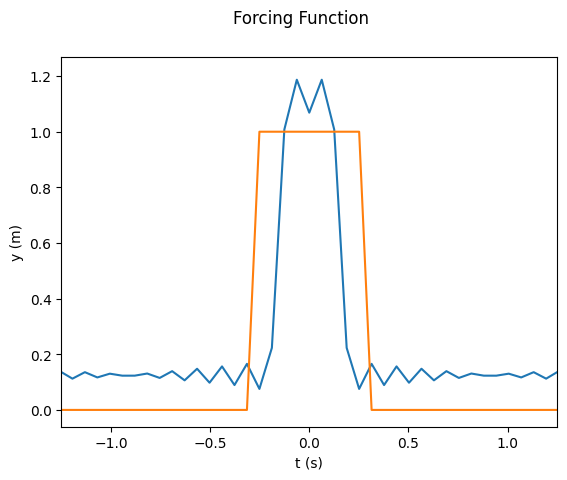

In [39]:
def omega(n):
    return 2.0*n*m.pi/T   # angular frequency of the nth harmonic
    
def A(n): # Amplitude of the response of the nth harmonic
    return b(n)/m.sqrt(m.pow((omega0*omega0-m.pow(omega(n),2)),2)+4.0*m.pow(omega(n),2)*beta*beta)
    
def delta(n): # phase of the response of the nth harmonic
    return m.atan2(2.0*omega(n)*beta, omega0*omega0-m.pow(omega(n),2))
	# Note: the Python atan2 function requires the argument order (y,x), opposite from MathCad
    
def F(t):  # The forcing function, represented as a truncated Fourier series
    r = bo*f0/T
    for n in range(1,N+1):
        r = r + b(n)*m.cos(omega(n)*t)
    return r
    
def x(t):  # The response, represented as a truncated Fourier series
    r = 0.
    for n in range(1,N+1):
        r = r + A(n)*m.sin(omega(n)*t - delta(n))
    return r

# Choose a set of time values at which to evaluate the solution y(t)
nStep = 100
step = 2.0*np.pi/nStep
t = np.arange(-np.pi,np.pi+step, step)

Fs = np.zeros(nStep+1)
Fexact = np.zeros(nStep+1)
xs = np.zeros(nStep+1)
for i in range(nStep+1):
    Fs[i] = F(t[i]);       # The forcing function as a truncated series
    Fexact[i] = Fa(t[i])   # Analytic function
    xs[i] = x(t[i]);       # The response of the oscillator

# Use pyplot from matplotlib to plot F(t)
fig, af = plt.subplots()
plt.xlim(-T/2., T/2.)
plt.suptitle('Forcing Function')
af.set_xlabel('t (s)')
af.set_ylabel('y (m)')
af.plot(t,Fs)
af.plot(t,Fexact)
plt.show()

The Fourier amplitudes of the response are 
[ 7.33352454e-03  1.52592323e-02  1.06828491e-02  2.56327770e-03
  9.89786938e-04  3.98461483e-04  1.28717645e-04  2.66908694e-20
 -5.72900453e-05 -7.59753988e-05 -7.37353239e-05 -6.09490135e-05
 -4.39962987e-05 -2.68200868e-05 -1.17517097e-05 -6.17630531e-21
  8.02253992e-06  1.24583148e-05]


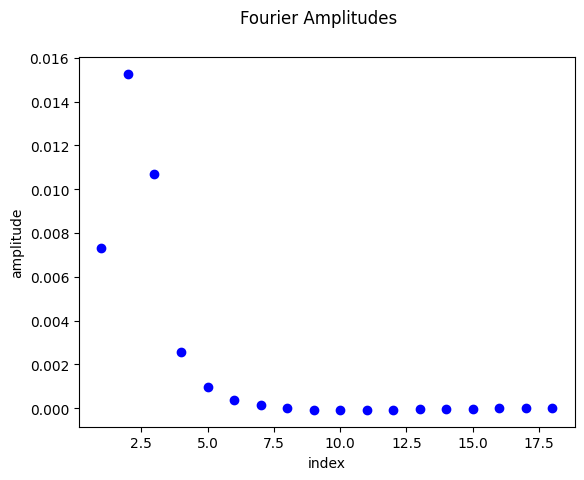

In [40]:
# Plot the Fourier amplitudes
inds = range(1,N+1)
Ds = np.zeros(N)
Phases = np.zeros(N)
for n in inds:
    Ds[n-1] = A(n)
    Phases[n-1] = delta(n)
print("The Fourier amplitudes of the response are ")
print(Ds)

fig, aD = plt.subplots()
plt.suptitle('Fourier Amplitudes')
aD.set_xlabel('index')
aD.set_ylabel('amplitude')
aD.plot(inds,Ds,'bo')
plt.show()

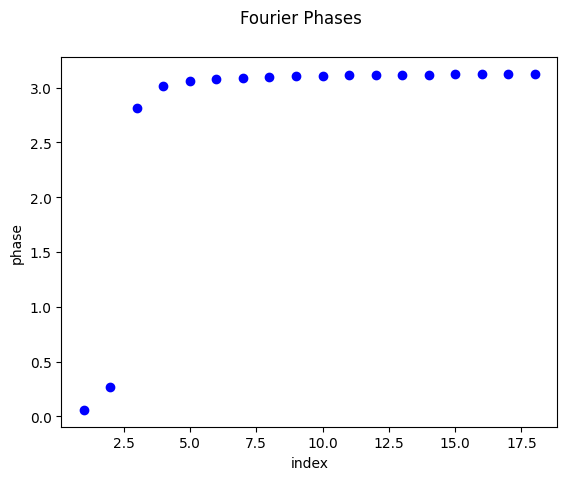

In [41]:
# Plot the Fourier phases
fig, dD = plt.subplots()
plt.suptitle('Fourier Phases')
dD.set_xlabel('index')
dD.set_ylabel('phase')
dD.plot(inds,Phases,'bo')
plt.show()

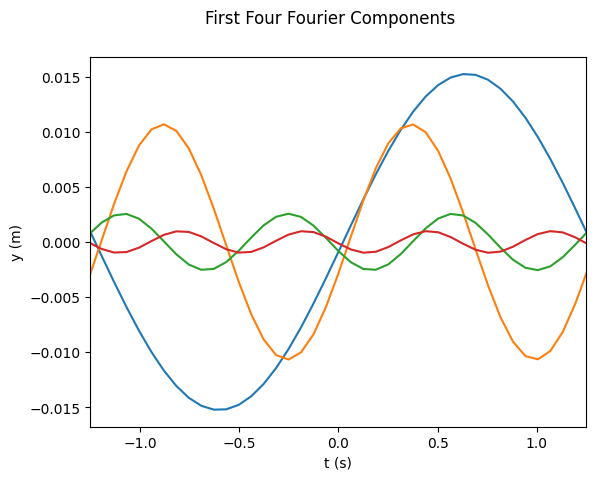

In [42]:
# Plot some individual Fourier components
# The numpy module is used for array handling
m1 = np.zeros(nStep+1)
m2 = np.zeros(nStep+1)
m3 = np.zeros(nStep+1)
m4 = np.zeros(nStep+1)
for i in range(nStep+1):
    m1[i] = Ds[1]*math.sin(omega(1)*t[i] - delta(1))
    m2[i] = Ds[2]*math.sin(omega(2)*t[i] - delta(2))
    m3[i] = Ds[3]*math.sin(omega(3)*t[i] - delta(3))
    m4[i] = Ds[4]*math.sin(omega(4)*t[i] - delta(4))
fig, am = plt.subplots()
plt.xlim(-T/2., T/2.)
plt.suptitle('First Four Fourier Components')
am.set_xlabel('t (s)')
am.set_ylabel('y (m)')
am.plot(t,m1)
am.plot(t,m2)
am.plot(t,m3)
am.plot(t,m4)
plt.show()

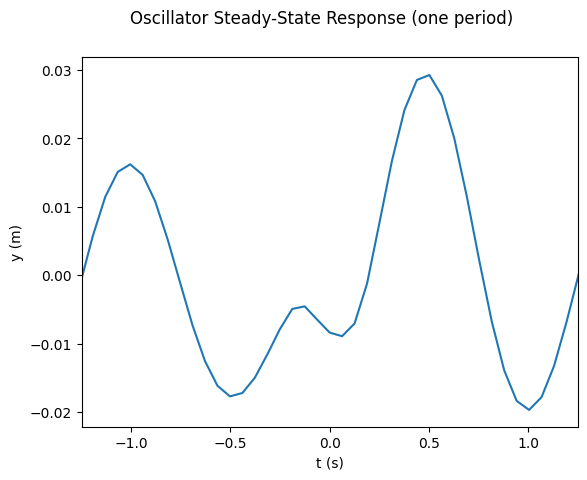

In [43]:
# Plot the full response
fig, ax = plt.subplots()
plt.xlim(-T/2., T/2.)
plt.suptitle('Oscillator Steady-State Response (one period)')
ax.set_xlabel('t (s)')
ax.set_ylabel('y (m)')
ax.plot(t,xs)
plt.show()